In [41]:
import pandas as pd
#from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, show 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
happiness_data = pd.read_csv("happiness_score_ds.csv")
happiness_data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df = happiness_data
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [33]:
df.drop(['Country'], axis=1)

,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,0.22628
154,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,0.18260
155,Middle East and Northern Africa,3.006,0.66320,0.72193,0.15684,0.18906,0.47179
156,Sub-Saharan Africa,2.905,0.01530,0.22396,0.11850,0.10062,0.19727


In [34]:
data_columns = ['Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','Generosity']

In [35]:
df = df[data_columns].copy()

In [36]:
df

,Region,Happiness Score,Economy (GDP per Capita),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,0.22628
154,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,0.18260
155,Middle East and Northern Africa,3.006,0.66320,0.72193,0.15684,0.18906,0.47179
156,Sub-Saharan Africa,2.905,0.01530,0.22396,0.11850,0.10062,0.19727


In [37]:
happy_df = df.rename({'Region':'region', 'Happiness Score':'happ_score', 'Economy (GDP per Capita)':'gdp', 'Health (Life Expectancy)':'health', 'Freedom':'freedom', 'Trust (Government Corruption)':'trust', 'Generosity':'generosity'}, axis =1)

In [38]:
happy_df

,region,happ_score,gdp,health,freedom,trust,generosity
0,Western Europe,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Western Europe,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Western Europe,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Western Europe,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,North America,7.427,1.32629,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,Sub-Saharan Africa,3.465,0.22208,0.42864,0.59201,0.55191,0.22628
154,Sub-Saharan Africa,3.340,0.28665,0.31910,0.48450,0.08010,0.18260
155,Middle East and Northern Africa,3.006,0.66320,0.72193,0.15684,0.18906,0.47179
156,Sub-Saharan Africa,2.905,0.01530,0.22396,0.11850,0.10062,0.19727


In [39]:
happy_df.isnull().sum()

region        0
happ_score    0
gdp           0
health        0
freedom       0
trust         0
generosity    0
dtype: int64

In [50]:
lab_enc = LabelEncoder()

In [51]:
df2 = lab_enc.fit_transform(happy_df['region'])
pd.Series(df2)

0      9
1      9
2      9
3      9
4      5
      ..
153    8
154    8
155    4
156    8
157    8
Length: 158, dtype: int32

In [52]:
happy_df['region'] = df2
happy_df

,region,happ_score,gdp,health,freedom,trust,generosity
0,9,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,9,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,9,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,9,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,5,7.427,1.32629,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...,...
153,8,3.465,0.22208,0.42864,0.59201,0.55191,0.22628
154,8,3.340,0.28665,0.31910,0.48450,0.08010,0.18260
155,4,3.006,0.66320,0.72193,0.15684,0.18906,0.47179
156,8,2.905,0.01530,0.22396,0.11850,0.10062,0.19727


Text(0, 0.5, 'GDP')

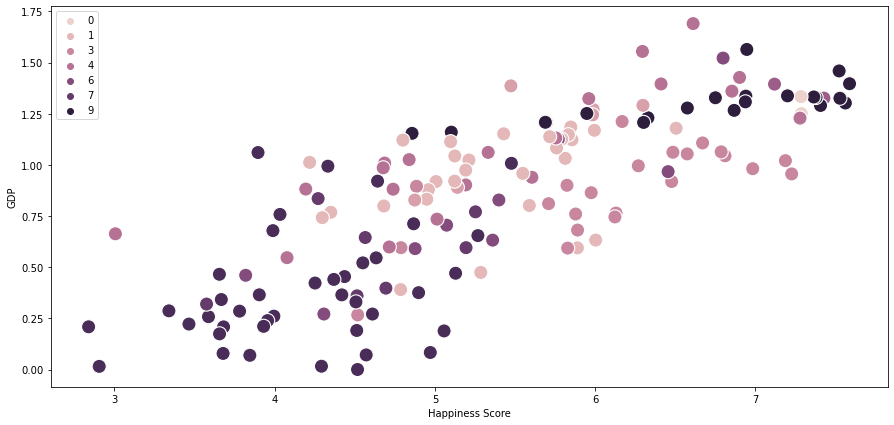

In [53]:
# create sctter plot
plt.rcParams['figure.figsize'] = (15,7)
sns.scatterplot(x='happ_score', y='gdp', data=happy_df, hue = happy_df.region, s=200)
plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP')

In [54]:
gdp_new = happy_df.groupby('region')['gdp'].sum()
gdp_new

region
0     2.58376
1    27.33071
2     6.91068
3    19.28994
4    21.33947
5     2.72080
6     7.10149
7     3.92340
8    15.21892
9    27.27051
Name: gdp, dtype: float64

Text(0, 0.5, 'GDP per capita')

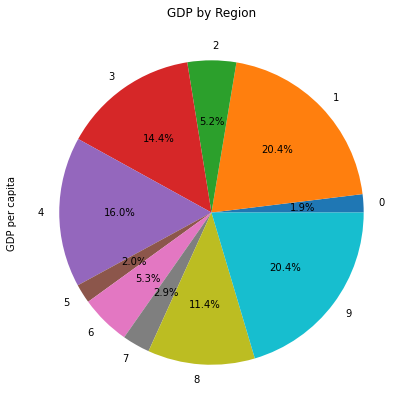

In [55]:
gdp_new.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('GDP per capita')

In [56]:
happy_df.corr()

,region,happ_score,gdp,health,freedom,trust,generosity
region,1.000000,-0.176791,-0.260139,-0.357508,0.092567,0.165040,0.273557
happ_score,-0.176791,1.000000,0.780966,0.724200,0.568211,0.395199,0.180319
gdp,-0.260139,0.780966,1.000000,0.816478,0.370300,0.307885,-0.010465
health,-0.357508,0.724200,0.816478,1.000000,0.360477,0.248335,0.108335
freedom,0.092567,0.568211,0.370300,0.360477,1.000000,0.493524,0.373916
trust,0.165040,0.395199,0.307885,0.248335,0.493524,1.000000,0.276123
generosity,0.273557,0.180319,-0.010465,0.108335,0.373916,0.276123,1.000000


<AxesSubplot:>

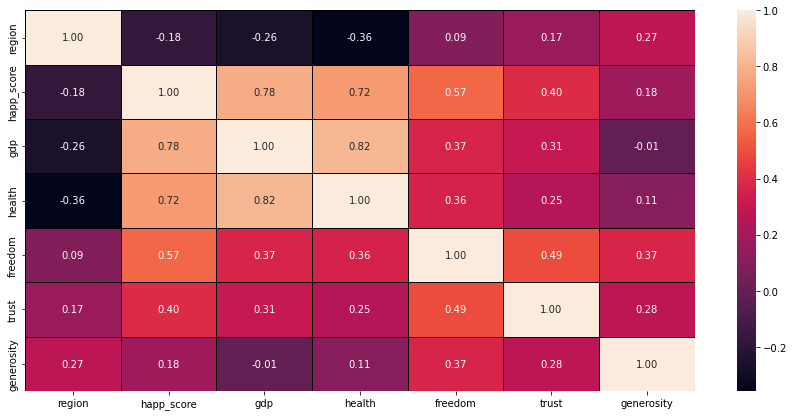

In [57]:
plt.figure(figsize=(15,7))
sns.heatmap(happy_df.corr(), annot=True, linewidth=0.5, linecolor='black', fmt='.2f')

In [58]:
corruption = happy_df.groupby('region')[['trust']].mean()
corruption

,trust
region,
0,0.392795
1,0.086674
2,0.127695
3,0.117172
4,0.181702
5,0.244235
6,0.151276
7,0.102536
8,0.123878


<BarContainer object of 10 artists>

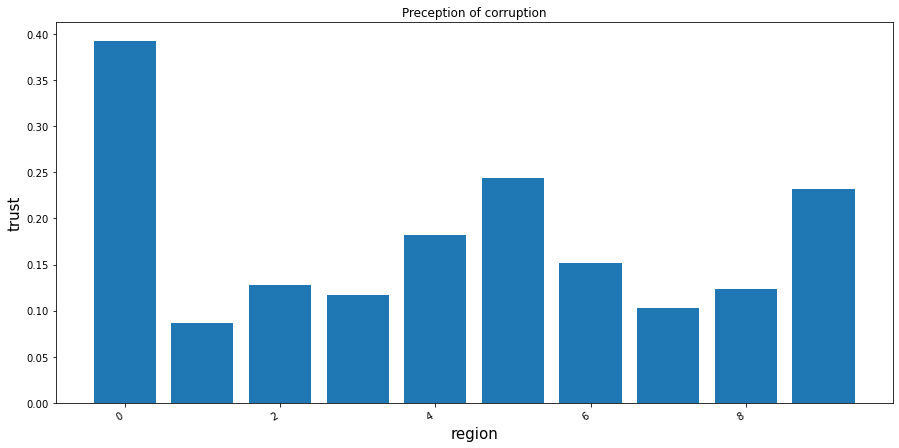

In [59]:
plt.title('Preception of corruption')
plt.xlabel('region', fontsize = 15)
plt.ylabel('trust', fontsize = 15)
plt.xticks(rotation =30, ha='right') #30 degree rotation of region
plt.bar(corruption.index, corruption.trust)

In [60]:
# data pre processing
X = happy_df.drop('happ_score', axis=1)
X

,region,gdp,health,freedom,trust,generosity
0,9,1.39651,0.94143,0.66557,0.41978,0.29678
1,9,1.30232,0.94784,0.62877,0.14145,0.43630
2,9,1.32548,0.87464,0.64938,0.48357,0.34139
3,9,1.45900,0.88521,0.66973,0.36503,0.34699
4,5,1.32629,0.90563,0.63297,0.32957,0.45811
...,...,...,...,...,...,...
153,8,0.22208,0.42864,0.59201,0.55191,0.22628
154,8,0.28665,0.31910,0.48450,0.08010,0.18260
155,4,0.66320,0.72193,0.15684,0.18906,0.47179
156,8,0.01530,0.22396,0.11850,0.10062,0.19727


In [85]:
# labeling
Y=happy_df['happ_score']
Y

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: happ_score, Length: 158, dtype: float64

In [86]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.30, random_state=4)

In [87]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [88]:
from sklearn import preprocessing
from sklearn import utils
from sklearn import preprocessing

In [93]:
#convert y values to categorical values
lab = preprocessing.LabelEncoder()
Y_train_transformed = lab.fit_transform(Y)
print(Y_train_transformed.astype('int'))

[156 155 154 153 152 151 150 149 148 147 146 145 144 143 142 141 140 139
 138 137 136 135 134 133 132 131 130 129 128 127 126 125 124 123 122 121
 120 119 118 117 116 115 114 113 112 111 110 109 108 107 106 105 104 103
 102 101 100  99  98  97  96  95  94  93  92  91  90  89  88  87  86  85
  84  83  82  81  80  79  78  77  76  75  75  74  73  72  71  70  69  68
  67  66  65  64  63  62  61  60  59  58  57  56  55  54  53  52  51  50
  49  48  47  46  45  44  43  42  41  40  39  38  37  36  35  34  33  32
  31  30  29  28  27  26  25  24  23  22  21  20  19  18  17  16  15  14
  13  12  11  10   9   8   7   6   5   4   3   2   1   0]


In [92]:
lm.fit(X_train, Y_train_transformed)

ValueError: Found input variables with inconsistent numbers of samples: [110, 158]